# Sizing & Drawing of I/O Up/Down Level-Shifter

**Copyright 2024 Simon Dorrer**

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0

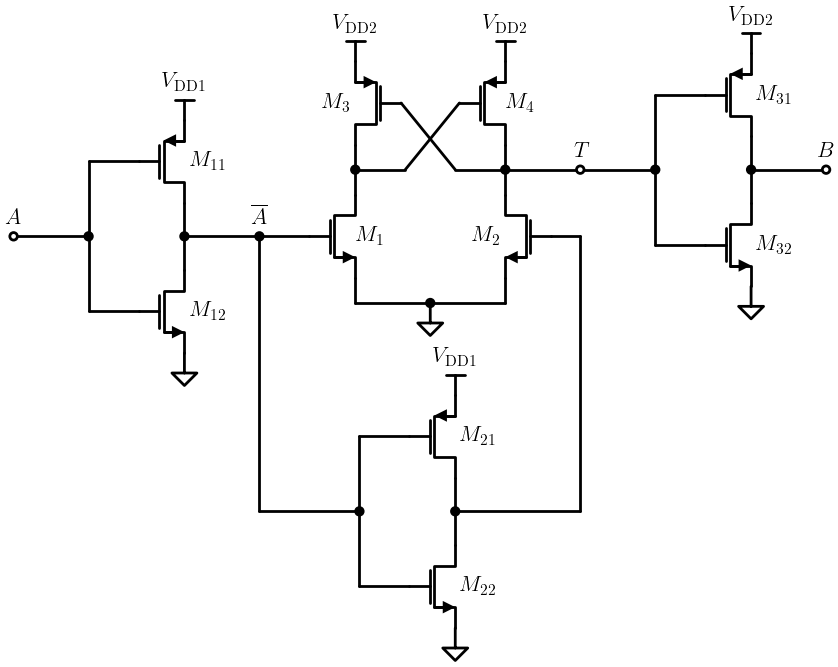

In [1]:
# Draw general Level-Shifter circuit without W/L
# Thick-Oxide Transistors (Inkscape)
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
import schemdraw.elements as elm
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=16)
    
    # Inverter X1
    elm.Dot(open=True).label('$A$')
    elm.Line().right().length(1.5).dot()
    Adot = d.here
    d.push()
    elm.Line().up().length(1.5)
    elm.Line().right().length(1)
    M11 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label('$M_{11}$', ofst=-1.75).reverse()
    elm.Vdd().at(M11.source).label('$V_\mathrm{DD1}$', loc='top', ofst=0.15)

    d.pop()

    elm.Line().down().length(1.5)
    elm.Line().right().length(1)
    M12 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label('$M_{12}$', ofst=-1.75).reverse()
    elm.GroundSignal().at(M12.source)

    elm.Line().at(M12.drain).toy(Adot).dot()
    d.push()
    elm.Line().toy(M11.drain)

    d.pop()

    elm.Line().right().length(1.5)
    elm.Dot().label('$\overline{A}$')
    Andot = d.here
    elm.Line().right().length(1)
    # =================================================================

    # NMOS diff. pair
    M1 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label('$M_{1}$', ofst=-1.5).reverse()
    elm.Line().at(M1.source).down().length(0.5)
    elm.Line().right().length(1.5).dot()
    d.push()
    elm.Line().right().length(1.5)
    elm.Line().up().length(0.5)
    M2 = elm.AnalogNFet(offset_gate=False).anchor('source').theta(0).label('$M_{2}$')
    d.pop()
    elm.GroundSignal()
    # =================================================================

    # PMOS cross-coupled pair
    elm.Line().at(M1.drain).up().length(0.5).dot()
    crossdot1 = d.here
    elm.Line().up().length(0.5)
    M3 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label('$M_{3}$')
    elm.Vdd().at(M3.source).label('$V_\mathrm{DD2}$', loc='top', ofst=0.15)

    elm.Line().at(M2.drain).up().length(0.5).dot()
    crossdot2 = d.here
    elm.Line().up().length(0.5)
    M4 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label('$M_{4}$', ofst=-1.5).reverse()
    elm.Vdd().at(M4.source).label('$V_\mathrm{DD2}$', loc='top', ofst=0.15)

    elm.Line().at(crossdot1).right().length(1)
    elm.Line().to(M4.gate)

    elm.Line().at(crossdot2).left().length(1)
    elm.Line().to(M3.gate)
    # =================================================================

    # Inverter X3
    elm.Line().at(crossdot2).right().length(1.5)
    elm.Dot(open=True).label('$T$')
    elm.Line().length(1.5).dot()
    Tdot = d.here
    d.push()
    elm.Line().up().length(1.5)
    elm.Line().right().length(1)
    M31 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label('$M_{31}$', ofst=-1.75).reverse()
    elm.Vdd().at(M31.source).label('$V_\mathrm{DD2}$', loc='top', ofst=0.15)

    d.pop()

    elm.Line().down().length(1.5)
    elm.Line().right().length(1)
    M32 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label('$M_{32}$', ofst=-1.75).reverse()
    elm.GroundSignal().at(M32.source)

    elm.Line().at(M32.drain).toy(Tdot).dot()
    d.push()
    elm.Line().toy(M31.drain)

    d.pop()

    elm.Line().right().length(1.5)
    elm.Dot(open=True).label('$B$')
    # =================================================================

    # Inverter X2
    elm.Line().at(Andot).down().length(5.5)
    elm.Line().right().length(2).dot()
    x2dot = d.here
    d.push()
    elm.Line().up().length(1.5)
    elm.Line().right().length(1)
    M21 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label('$M_{21}$', ofst=-1.75).reverse()
    elm.Vdd().at(M21.source).label('$V_\mathrm{DD1}$', loc='top', ofst=0.15)

    d.pop()

    elm.Line().down().length(1.5)
    elm.Line().right().length(1)
    M22 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label('$M_{22}$', ofst=-1.75).reverse()
    elm.GroundSignal().at(M22.source)

    elm.Line().at(M22.drain).toy(x2dot).dot()
    d.push()
    elm.Line().toy(M21.drain)

    d.pop()

    elm.Line().right().length(2.5)
    elm.Line().up().length(5.5)
    elm.Line().tox(M2.gate)
    # =================================================================

    # Save the schematic
    d.save('figures/level_shifter/level_shifter_circuit.svg')
    d.save('figures/level_shifter/level_shifter_circuit.pdf')

# Level-Up-Shifter

In [2]:
# Level-Up-Shifter Sizing
# The pull-down NMOS transistors have to overcome the PMOS latch action before the output change state, so the size of M1 and M2 are larger than M3 and M4.
# For LV and HV the smallest length for fast settling time is chosen. HV transistor can be used from L > 0.45um. HV PMOS width is always 3um for good matching. 
# HV NMOS width is 10um in latch and 1um in output inverter. LV PMOS and NMOS width is always 1um for good matching.

# Xschem subcircuit parameters in um
# HV Transistors
W_P_HV = 3.0
L_P_HV = 0.50
W_N_HV = 10.0
L_N_HV = 0.50

# LV Transistors
W_P_LV = 1.0
L_P_LV = 0.13
W_N_LV = 1.0
L_N_LV = 0.13

# LV Inverter x1
w_11 = W_P_LV # LV PMOS
l_11 = L_P_LV # LV PMOS
w_12 = W_N_LV # LV NMOS
l_12 = L_N_LV # LV NMOS

# LV Inverter x2
w_21 = W_P_LV # LV PMOS
l_21 = L_P_LV # LV PMOS
w_22 = W_N_LV # LV NMOS
l_22 = L_N_LV # LV NMOS

# HV Inverter x3
w_31 = W_P_HV # HV PMOS
l_31 = L_P_HV # HV PMOS
w_32 = 0.1 * W_N_HV # HV NMOS
l_32 = L_N_HV # HV NMOS

# HV Cross-coupled PMOS pair latch
w_1 = W_N_HV # HV NMOS
l_1 = L_N_HV # HV NMOS
w_2 = W_N_HV # HV NMOS
l_2 = L_N_HV # HV NMOS

w_3 = W_P_HV # HV PMOS
l_3 = L_P_HV # HV PMOS
w_4 = W_P_HV # HV PMOS
l_4 = L_P_HV # HV PMOS

In [3]:
print('Level-Up-Shifter W/L ratios:')
print('------------------------------------')
print('LV Inverter x1')
print('LV PMOS M11: W =', w_11,'um, L =', l_11,'um')
print('LV NMOS M12: W =', w_12,'um, L =', l_12,'um')
print('------------------------------------')
print('LV Inverter x2')
print('LV PMOS M21: W =', w_21,'um, L =', l_21,'um')
print('LV NMOS M22: W =', w_22,'um, L =', l_22,'um')
print('------------------------------------')
print('HV Inverter x3')
print('HV PMOS M31: W =', w_31,'um, L =', l_31,'um')
print('HV NMOS M32: W =', w_32,'um, L =', l_32,'um')
print('------------------------------------')
print('HV Cross-coupled PMOS pair latch')
print('HV NMOS M1: W =', w_1,'um, L =', l_1,'um')
print('HV NMOS M2: W =', w_2,'um, L =', l_2,'um')
print('HV PMOS M3: W =', w_3,'um, L =', l_3,'um')
print('HV PMOS M4: W =', w_4,'um, L =', l_4,'um')
print('------------------------------------')

Level-Up-Shifter W/L ratios:
------------------------------------
LV Inverter x1
LV PMOS M11: W = 1.0 um, L = 0.13 um
LV NMOS M12: W = 1.0 um, L = 0.13 um
------------------------------------
LV Inverter x2
LV PMOS M21: W = 1.0 um, L = 0.13 um
LV NMOS M22: W = 1.0 um, L = 0.13 um
------------------------------------
HV Inverter x3
HV PMOS M31: W = 3.0 um, L = 0.5 um
HV NMOS M32: W = 1.0 um, L = 0.5 um
------------------------------------
HV Cross-coupled PMOS pair latch
HV NMOS M1: W = 10.0 um, L = 0.5 um
HV NMOS M2: W = 10.0 um, L = 0.5 um
HV PMOS M3: W = 3.0 um, L = 0.5 um
HV PMOS M4: W = 3.0 um, L = 0.5 um
------------------------------------


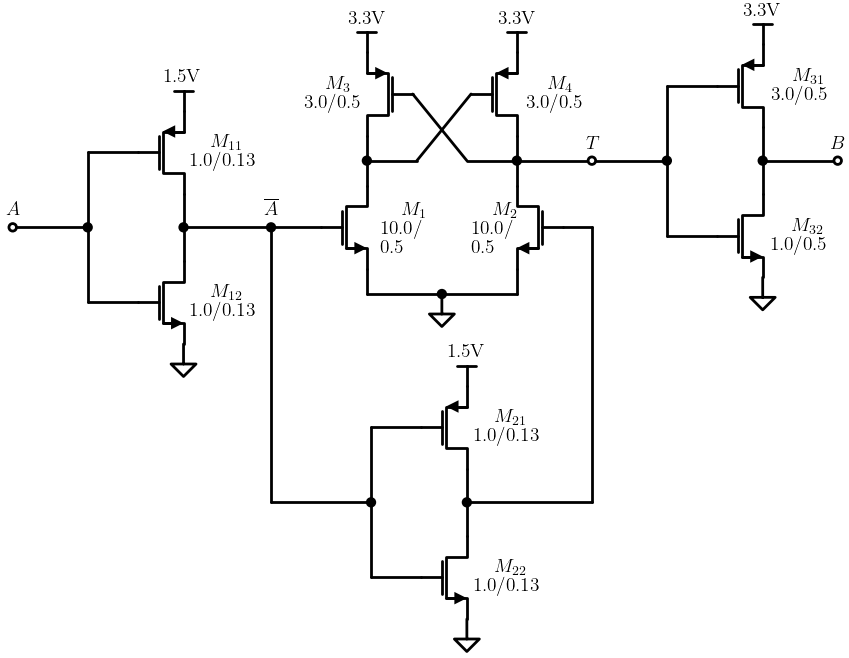

In [4]:
# Draw Level-Up-Shifter circuit with W/L
# Thick-Oxide Transistors (Inkscape)
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
import schemdraw.elements as elm
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=14)
    
    # Inverter X1
    elm.Dot(open=True).label('$A$')
    elm.Line().right().length(1.5).dot()
    Adot = d.here
    d.push()
    elm.Line().up().length(1.5)
    elm.Line().right().length(1)
    M11 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{11} \\$'+str(w_11)+'/'+str(l_11), ofst=-2.4).reverse()
    elm.Vdd().at(M11.source).label(str(1.5)+'V')

    d.pop()

    elm.Line().down().length(1.5)
    elm.Line().right().length(1)
    M12 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{12} \\$'+str(w_12)+'/'+str(l_12), ofst=-2.4).reverse()
    elm.GroundSignal().at(M12.source)

    elm.Line().at(M12.drain).toy(Adot).dot()
    d.push()
    elm.Line().toy(M11.drain)

    d.pop()

    elm.Line().right().length(1.75)
    elm.Dot().label('$\overline{A}$')
    Andot = d.here
    elm.Line().right().length(1)
    # =================================================================

    # NMOS diff. pair
    M1 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{1} \\$'+str(w_1)+r'/$\\$'+str(l_1), ofst=-2.1).reverse()
    elm.Line().at(M1.source).down().length(0.5)
    elm.Line().right().length(1.5).dot()
    d.push()
    elm.Line().right().length(1.5)
    elm.Line().up().length(0.5)
    M2 = elm.AnalogNFet(offset_gate=False).anchor('source').theta(0).label(r'$M_{2} \\$'+str(w_2)+r'/$\\$'+str(l_2), ofst=-0.0)
    d.pop()
    elm.GroundSignal()
    # =================================================================

    # PMOS cross-coupled pair
    elm.Line().at(M1.drain).up().length(0.5).dot()
    crossdot1 = d.here
    elm.Line().up().length(0.5)
    M3 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_{3} \\$'+str(w_3)+'/'+str(l_3))
    elm.Vdd().at(M3.source).label(str(3.3)+'V')

    elm.Line().at(M2.drain).up().length(0.5).dot()
    crossdot2 = d.here
    elm.Line().up().length(0.5)
    M4 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_{4} \\$'+str(w_4)+'/'+str(l_4), ofst=-2.25).reverse()
    elm.Vdd().at(M4.source).label(str(3.3)+'V')

    elm.Line().at(crossdot1).right().length(1)
    elm.Line().to(M4.gate)

    elm.Line().at(crossdot2).left().length(1)
    elm.Line().to(M3.gate)
    # =================================================================

    # Inverter X3
    elm.Line().at(crossdot2).right().length(1.5)
    elm.Dot(open=True).label('$T$')
    elm.Line().length(1.5).dot()
    Tdot = d.here
    d.push()
    elm.Line().up().length(1.5)
    elm.Line().right().length(1)
    M31 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{31} \\$'+str(w_31)+'/'+str(l_31), ofst=-2.25).reverse()
    elm.Vdd().at(M31.source).label(str(3.3)+'V')

    d.pop()

    elm.Line().down().length(1.5)
    elm.Line().right().length(1)
    M32 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{32} \\$'+str(w_32)+'/'+str(l_32), ofst=-2.25).reverse()
    elm.GroundSignal().at(M32.source)

    elm.Line().at(M32.drain).toy(Tdot).dot()
    d.push()
    elm.Line().toy(M31.drain)

    d.pop()

    elm.Line().right().length(1.5)
    elm.Dot(open=True).label('$B$')
    # =================================================================

    # Inverter X2
    elm.Line().at(Andot).down().length(5.5)
    elm.Line().right().length(2).dot()
    x2dot = d.here
    d.push()
    elm.Line().up().length(1.5)
    elm.Line().right().length(1)
    M21 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{21} \\$'+str(w_21)+'/'+str(l_21), ofst=-2.4).reverse()
    elm.Vdd().at(M21.source).label(str(1.5)+'V')

    d.pop()

    elm.Line().down().length(1.5)
    elm.Line().right().length(1)
    M22 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{22} \\$'+str(w_22)+'/'+str(l_22), ofst=-2.4).reverse()
    elm.GroundSignal().at(M22.source)

    elm.Line().at(M22.drain).toy(x2dot).dot()
    d.push()
    elm.Line().toy(M21.drain)

    d.pop()

    elm.Line().right().length(2.5)
    elm.Line().up().length(5.5)
    elm.Line().tox(M2.gate)
    # =================================================================

    # Save the schematic
    d.save('figures/level_shifter/level_up_shifter_circuit.svg')
    d.save('figures/level_shifter/level_up_shifter_circuit.pdf')

# Level-Down-Shifter

In [5]:
# Level-Down-Shifter Sizing
# The pull-down NMOS transistors have to overcome the PMOS latch action before the output change state, so the size of M1 and M2 are larger than M3 and M4.
# For LV and HV the smallest length for fast settling time is chosen. HV transistor is useable at L>0.45um. HV PMOS width is always 3um for good matching. 
# HV NMOS width is always 1um for good matching. LV PMOS width is always 3um for good matching. LV NMOS width is 10um in latch and 1um in output inverter.

# Xschem subcircuit parameters in um
# HV Transistors
W_P_HV = 3.0
L_P_HV = 0.50
W_N_HV = 1.0
L_N_HV = 0.50

# LV Transistors
W_P_LV = 3.0
L_P_LV = 0.13
W_N_LV = 10.0
L_N_LV = 0.13

# HV Inverter x1
w_11 = W_P_HV # HV PMOS
l_11 = L_P_HV # HV PMOS
w_12 = W_N_HV # HV NMOS
l_12 = L_N_HV # HV NMOS

# HV Inverter x2
w_21 = W_P_HV # HV PMOS
l_21 = L_P_HV # HV PMOS
w_22 = W_N_HV # HV NMOS
l_22 = L_N_HV # HV NMOS

# LV Inverter x3
w_31 = W_P_LV # LV PMOS
l_31 = L_P_LV # LV PMOS
w_32 = 0.1 * W_N_LV # LV NMOS
l_32 = L_N_LV # LV NMOS

# LV Cross-coupled PMOS pair latch
w_1 = W_N_LV # LV NMOS
l_1 = L_N_LV # LV NMOS
w_2 = W_N_LV # LV NMOS
l_2 = L_N_LV # LV NMOS

w_3 = W_P_LV # LV PMOS
l_3 = L_P_LV # LV PMOS
w_4 = W_P_LV # LV PMOS
l_4 = L_P_LV # LV PMOS

In [6]:
print('Level-Down-Shifter W/L ratios:')
print('------------------------------------')
print('HV Inverter x1')
print('HV PMOS M11: W =', w_11,'um, L =', l_11,'um')
print('HV NMOS M12: W =', w_12,'um, L =', l_12,'um')
print('------------------------------------')
print('HV Inverter x2')
print('HV PMOS M21: W =', w_21,'um, L =', l_21,'um')
print('HV NMOS M22: W =', w_22,'um, L =', l_22,'um')
print('------------------------------------')
print('LV Inverter x3')
print('LV PMOS M31: W =', w_31,'um, L =', l_31,'um')
print('LV NMOS M32: W =', w_32,'um, L =', l_32,'um')
print('------------------------------------')
print('LV Cross-coupled PMOS pair latch')
print('LV NMOS M1: W =', w_1,'um, L =', l_1,'um')
print('LV NMOS M2: W =', w_2,'um, L =', l_2,'um')
print('LV PMOS M3: W =', w_3,'um, L =', l_3,'um')
print('LV PMOS M4: W =', w_4,'um, L =', l_4,'um')
print('------------------------------------')

Level-Down-Shifter W/L ratios:
------------------------------------
HV Inverter x1
HV PMOS M11: W = 3.0 um, L = 0.5 um
HV NMOS M12: W = 1.0 um, L = 0.5 um
------------------------------------
HV Inverter x2
HV PMOS M21: W = 3.0 um, L = 0.5 um
HV NMOS M22: W = 1.0 um, L = 0.5 um
------------------------------------
LV Inverter x3
LV PMOS M31: W = 3.0 um, L = 0.13 um
LV NMOS M32: W = 1.0 um, L = 0.13 um
------------------------------------
LV Cross-coupled PMOS pair latch
LV NMOS M1: W = 10.0 um, L = 0.13 um
LV NMOS M2: W = 10.0 um, L = 0.13 um
LV PMOS M3: W = 3.0 um, L = 0.13 um
LV PMOS M4: W = 3.0 um, L = 0.13 um
------------------------------------


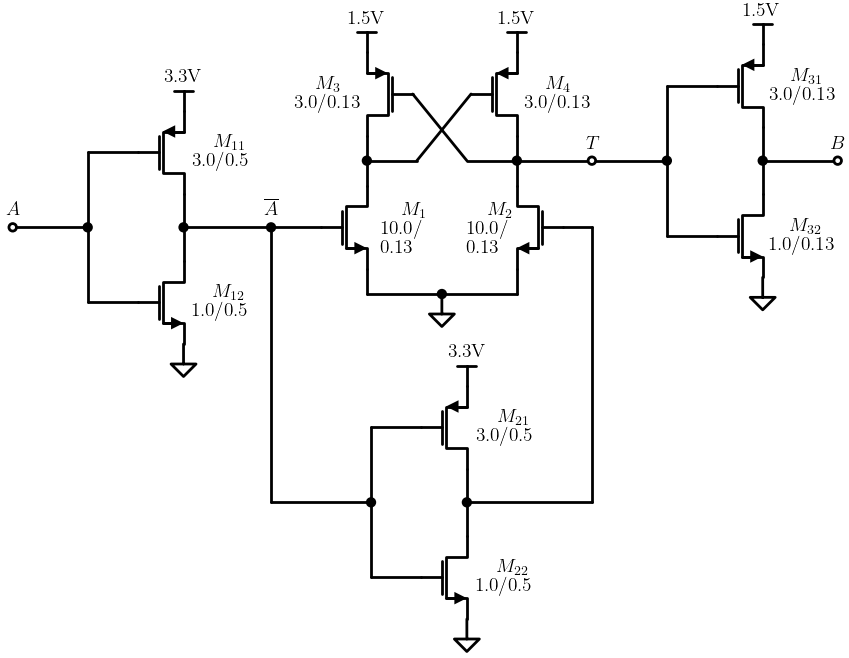

In [7]:
# Draw Level-Down-Shifter circuit with W/L
# Thick-Oxide Transistors (Inkscape)
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern"
})
import schemdraw as sd
import schemdraw.elements as elm
sd.svgconfig.svg2 = False
with sd.Drawing() as d:
    d.config(unit=2)
    d.config(fontsize=14)
    
    # Inverter X1
    elm.Dot(open=True).label('$A$')
    elm.Line().right().length(1.5).dot()
    Adot = d.here
    d.push()
    elm.Line().up().length(1.5)
    elm.Line().right().length(1)
    M11 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{11} \\$'+str(w_11)+'/'+str(l_11), ofst=-2.25).reverse()
    elm.Vdd().at(M11.source).label(str(3.3)+'V')

    d.pop()

    elm.Line().down().length(1.5)
    elm.Line().right().length(1)
    M12 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{12} \\$'+str(w_12)+'/'+str(l_12), ofst=-2.25).reverse()
    elm.GroundSignal().at(M12.source)

    elm.Line().at(M12.drain).toy(Adot).dot()
    d.push()
    elm.Line().toy(M11.drain)

    d.pop()

    elm.Line().right().length(1.75)
    elm.Dot().label('$\overline{A}$')
    Andot = d.here
    elm.Line().right().length(1)
    # =================================================================

    # NMOS diff. pair
    M1 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{1} \\$'+str(w_1)+r'/$\\$'+str(l_1), ofst=-2.1).reverse()
    elm.Line().at(M1.source).down().length(0.5)
    elm.Line().right().length(1.5).dot()
    d.push()
    elm.Line().right().length(1.5)
    elm.Line().up().length(0.5)
    M2 = elm.AnalogNFet(offset_gate=False).anchor('source').theta(0).label(r'$M_{2} \\$'+str(w_2)+r'/$\\$'+str(l_2))
    d.pop()
    elm.GroundSignal()
    # =================================================================

    # PMOS cross-coupled pair
    elm.Line().at(M1.drain).up().length(0.5).dot()
    crossdot1 = d.here
    elm.Line().up().length(0.5)
    M3 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_{3} \\$'+str(w_3)+'/'+str(l_3))
    elm.Vdd().at(M3.source).label(str(1.5)+'V')

    elm.Line().at(M2.drain).up().length(0.5).dot()
    crossdot2 = d.here
    elm.Line().up().length(0.5)
    M4 = elm.AnalogPFet(offset_gate=False).anchor('drain').theta(0).label(r'$M_{4} \\$'+str(w_4)+'/'+str(l_4), ofst=-2.4).reverse()
    elm.Vdd().at(M4.source).label(str(1.5)+'V')

    elm.Line().at(crossdot1).right().length(1)
    elm.Line().to(M4.gate)

    elm.Line().at(crossdot2).left().length(1)
    elm.Line().to(M3.gate)
    # =================================================================

    # Inverter X3
    elm.Line().at(crossdot2).right().length(1.5)
    elm.Dot(open=True).label('$T$')
    elm.Line().length(1.5).dot()
    Tdot = d.here
    d.push()
    elm.Line().up().length(1.5)
    elm.Line().right().length(1)
    M31 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{31} \\$'+str(w_31)+'/'+str(l_31), ofst=-2.4).reverse()
    elm.Vdd().at(M31.source).label(str(1.5)+'V')

    d.pop()

    elm.Line().down().length(1.5)
    elm.Line().right().length(1)
    M32 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{32} \\$'+str(w_32)+'/'+str(l_32), ofst=-2.4).reverse()
    elm.GroundSignal().at(M32.source)

    elm.Line().at(M32.drain).toy(Tdot).dot()
    d.push()
    elm.Line().toy(M31.drain)

    d.pop()

    elm.Line().right().length(1.5)
    elm.Dot(open=True).label('$B$')
    # =================================================================

    # Inverter X2
    elm.Line().at(Andot).down().length(5.5)
    elm.Line().right().length(2).dot()
    x2dot = d.here
    d.push()
    elm.Line().up().length(1.5)
    elm.Line().right().length(1)
    M21 = elm.AnalogPFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{21} \\$'+str(w_21)+'/'+str(l_21), ofst=-2.25).reverse()
    elm.Vdd().at(M21.source).label(str(3.3)+'V')

    d.pop()

    elm.Line().down().length(1.5)
    elm.Line().right().length(1)
    M22 = elm.AnalogNFet(offset_gate=False).anchor('gate').theta(0).label(r'$M_{22} \\$'+str(w_22)+'/'+str(l_22), ofst=-2.25).reverse()
    elm.GroundSignal().at(M22.source)

    elm.Line().at(M22.drain).toy(x2dot).dot()
    d.push()
    elm.Line().toy(M21.drain)

    d.pop()

    elm.Line().right().length(2.5)
    elm.Line().up().length(5.5)
    elm.Line().tox(M2.gate)
    # =================================================================

    # Save the schematic
    d.save('figures/level_shifter/level_down_shifter_circuit.svg')
    d.save('figures/level_shifter/level_down_shifter_circuit.pdf')